<a href="https://colab.research.google.com/github/RadhikaRM/Bookrecommendersystem/blob/main/Final_Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



#***Book Recommendation System***


<img src="https://assets.rbl.ms/25570446/origin.jpg" width="600px" height="400px"/>


# **Problem Statement**

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

Recommendation systems are used in hundreds of different services - everywhere from online shopping to
music to movies. 
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. 

The main objective of our project is to create book recommendation systems for users on various approaches .



In [ ]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",1000)#setting maximum column width
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
#To create wordcloud
plt.rcParams["figure.figsize"] = (8,8)

In [ ]:
#loading the required datasets
books_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Books.csv',low_memory=False,error_bad_lines=False,encoding="latin-1")
rating_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Ratings.csv',low_memory=False,error_bad_lines=False,encoding="latin-1")
users_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Users.csv',low_memory=False,error_bad_lines=False,encoding="latin-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## **Taking a look at datasets**

In [ ]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [ ]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg


In [ ]:
rating_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [ ]:
# shapes of all the datasets
print('Shape of Users: {}, Books: {} and Ratings: {}'.format(users_df.shape, books_df.shape, rating_df.shape))

Shape of Users: (278858, 3), Books: (271360, 8) and Ratings: (1149780, 3)


# **Books data**



---


###**Data Description**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
print('This shape of Books datasheet is : ',books_df.shape)
print('='*30)
print('This shape of Ratings datasheet is : ',rating_df.shape)
print('='*30)
print('This shape of Users datasheet is : ',users_df.shape)

This shape of Books datasheet is :  (271360, 8)
This shape of Ratings datasheet is :  (1149780, 3)
This shape of Users datasheet is :  (278858, 3)


In [ ]:
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [ ]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,17627,7535,2,2,2


In [ ]:
# Missing value percentage
print(books_df.isnull().sum()/len(books_df)*100)

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64


In [ ]:
# Checking  for  null value in book author
books_df[books_df['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [ ]:
#Filling the null value
books_df.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [ ]:
# Checking null values in publisher
books_df[books_df['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [ ]:
#Replacing NaNs with correct  values
books_df.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books_df.loc[129037, 'Publisher'] = 'Bantam'

In [ ]:
#insepcting the values in year of publication
books_df['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

Name of few publication companies have been incorrectly put in this column.There are values such as 0 ,2024,2030 etc. which is also not possible .Let's rectify these mistakes

In [ ]:
# correcting this error
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [ ]:
# on searching for these  books we came to know about its authors
#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [ ]:
#checking the rows having 'Gallimard' as yearOfPublication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?ÃÂ©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [ ]:
books_df.loc[books_df.ISBN=='2070426769','Year-Of-Publication']=2003
books_df.loc[books_df.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.loc[books_df.ISBN=='2070426769','Publisher']='Gallimard'
books_df.loc[books_df.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

In [ ]:
#Checking if the corrections are in place
books_df.loc[books_df['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [ ]:
# changing dtype of year of publication
books_df['Year-Of-Publication'] =books_df['Year-Of-Publication'].astype(int)

In [ ]:
# something is off about years of publication like:
books_df[(books_df['Year-Of-Publication'] > 0) & (books_df['Year-Of-Publication'] < 1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÃÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [ ]:
#replacing with correct  values
books_df.loc[books_df.ISBN=='	9643112136','Year-Of-Publication'] = 2010
books_df.loc[books_df.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [ ]:
#Sustituting np.Nan in rows with year=0 or  greater than the current year,2022.
books_df.loc[(books_df['Year-Of-Publication'] > 2022) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

# replacing NaN values with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(int(books_df['Year-Of-Publication'].median()), inplace=True)

In [ ]:
books_df['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102023, dtype: int64

In [ ]:
books_df['Publisher'].value_counts()

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16804, dtype: int64

In [ ]:
#Inspecting the missing values in 'Publisher' column
books_df.loc[books_df.Publisher.isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
#Uppercasing the ISBN numbers and Book-Author name
books_df['ISBN']=books_df['ISBN'].str.upper()
books_df['Book-Author']=books_df['Book-Author'].str.upper()

In [ ]:
books_df[books_df['Book-Title']=='Emma']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1495,0451523067,Emma,JANE AUSTEN,1994.0,New Amer Library Classics,http://images.amazon.com/images/P/0451523067.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.LZZZZZZZ.jpg
8763,055321019X,Emma,JANE AUSTEN,1981.0,Bantam Books,http://images.amazon.com/images/P/055321019X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.LZZZZZZZ.jpg
11571,0553212737,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553212737.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.LZZZZZZZ.jpg
14263,0140258175,Emma,JANE AUSTEN,1996.0,Penguin Putnam~trade,http://images.amazon.com/images/P/0140258175.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.LZZZZZZZ.jpg
45955,B000051WXP,Emma,JANE AUSTEN,1996.0,Random House,http://images.amazon.com/images/P/B000051WXP.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.LZZZZZZZ.jpg
53513,0760701652,Emma,JANE AUSTEN,1996.0,Barnes Noble Books,http://images.amazon.com/images/P/0760701652.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.LZZZZZZZ.jpg
90473,2253140732,Emma,JANE AUSTEN,1997.0,LGF,http://images.amazon.com/images/P/2253140732.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.LZZZZZZZ.jpg
106616,0460010247,Emma,JANE AUSTEN,1976.0,J m Dent &amp; Sons Ltd,http://images.amazon.com/images/P/0460010247.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.LZZZZZZZ.jpg
133269,0553211595,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553211595.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.LZZZZZZZ.jpg
166404,0681218894,Emma,JANE AUSTEN,1996.0,Hunter Publishing+inc,http://images.amazon.com/images/P/0681218894.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.LZZZZZZZ.jpg


ISBN numbers for books with the same title and author would change if the year of release (revised editions),regional versions or publishing companies are different. So, let's look for rows where entire column values are identical.

In [ ]:
#Checking for duplicates in books_df
books_df[books_df.duplicated()]                

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730X,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,JAMES FINN GARNER,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),NATHANIEL HAWTHORNE,1994.0,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.LZZZZZZZ.jpg
16298,097089726X,Jasper,MICHELLE GROCE,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.LZZZZZZZ.jpg
19266,039592720X,Interpreter of Maladies,JHUMPA LAHIRI,1999.0,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.LZZZZZZZ.jpg
22339,042512164X,Capital Crimes,LAWRENCE SANDERS,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. RON HUBBARD,1995.0,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.LZZZZZZZ.jpg
269297,055215038X,The Sleeper,GILLIAN WHITE,2003.0,Corgi Books,http://images.amazon.com/images/P/055215038X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.LZZZZZZZ.jpg
269552,037376099X,"Patient Nurse (Man Of The Month) (Harlequin Desire, No 1099)",DIANA PALMER,1997.0,Silhouette,http://images.amazon.com/images/P/037376099X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.LZZZZZZZ.jpg
270285,189481505X,I-O,SIMON LOGAN,2002.0,Prime (OH),http://images.amazon.com/images/P/189481505X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.LZZZZZZZ.jpg


In [ ]:
#Dropping the rows with the entire column values are duplicated
books_df.drop_duplicates(keep="first",inplace=True)
books_df.reset_index(drop=True,inplace=True)   

In [ ]:
#Dropping the image urls
books_df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271047 non-null  object 
 1   Book-Title           271047 non-null  object 
 2   Book-Author          271047 non-null  object 
 3   Year-Of-Publication  271047 non-null  float64
 4   Publisher            271047 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.3+ MB


# **Users Data**


---




###**Data description**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

In [ ]:
#displaying the top 10 and bottom 10 rows of the dataframe
pd.concat([users_df.head(10),users_df.tail(10)],axis=0)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [ ]:
#inspecting the columns in users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
* The 'Age' column has null values

In [ ]:
#Checking for duplicates in users_df
users_df[users_df['User-ID'].duplicated()].sum()

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

In [ ]:
#Percentage of missing values in users_df
print(users_df.isnull().sum()/len(users_df)*100)

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


* The 39.7% of values in the 'Age' column are missing/NaN values

In [ ]:
#summarizing data in 'Age' column
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

* The maximum value in the 'Age' column is 244. This is certainly an outlier.

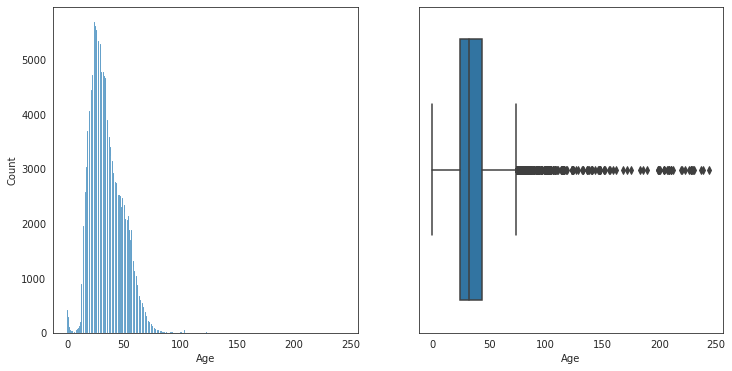

In [ ]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users_df)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users_df)

* Most of the users are from the age group 25-50
* It is highly unlikely to have users under the age of 4 and above 100.The peaks near 0 and 100 in the kdeplot indicates that there are some outlier values in the 'Age' column

It is highly unlikely to have users of age above 95 and below 4 in this case.Let's replace these values with np.nan

In [ ]:
#replacing the outliers in 'Age' with NaN value
users_df.loc[(users_df['Age']>95)|(users_df['Age']<4),'Age']=np.nan

In [ ]:
#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',users_df['Age'].isnull().sum())
#Imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users_df['Age'].describe()

The number of missing values is  112001


count    166857.000000
mean         34.734222
std          13.621521
min           4.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          95.000000
Name: Age, dtype: float64

In [ ]:
# create a normal distribution pd.Series to fill Nan values with
normal_age_series = pd.Series(np.random.normal(loc=users_df.Age.mean(), scale=users_df.Age.std(), size=users_df[users_df.Age.isna()]['User-ID'].count()))

# take the absolute value of temp_age_series
abs_age_series=np.abs(normal_age_series)

# sort users df so as NaN values in age to be first and reset index to match with index of abs_age_series. Then using fillna()
users_df = users_df.sort_values('Age',na_position='first').reset_index(drop=True)
users_df.Age.fillna(round(abs_age_series), inplace = True)  


In [ ]:
#after imputation
users_df.Age.describe()

count    278858.000000
mean         34.736178
std          13.562340
min           0.000000
25%          25.000000
50%          33.000000
75%          44.000000
max         105.000000
Name: Age, dtype: float64

In [ ]:
#percentage of missing values in 'Age' column
(users_df['Age'].isnull().sum()/len(users_df))*100


0.0

In [ ]:
def age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [ ]:
users_df['Age_group']=users_df['Age'].apply(lambda x: age_group(x))

The missing values in the 'Age' column have been imputed with values from a normal distribution 

Now let's inspect the 'Location' column.

In [ ]:
#number of unique values in 'Location'
users_df['Location'].nunique()

57339

In [ ]:
#extracting the country names from users_df
for i in users_df:
    users_df['Country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
#Displaying the country names
set(users_df['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn wÃ¼rtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedÃ\xa0',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c',
 'ca

In [ ]:
#correcting the mispelled country names
users_df.loc[users_df['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users_df.loc[users_df['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users_df.loc[users_df['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users_df.loc[users_df['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users_df.loc[users_df['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users_df.loc[users_df['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users_df.loc[users_df['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users_df['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)
 


In [ ]:
#Converting the country names to uppercase
users_df['Country']=users_df['Country'].str.upper()

In [ ]:
#Dropping the column 'Location'
users_df.drop('Location',axis=1,inplace=True)

In [ ]:
users_df.columns

Index(['User-ID', 'Age', 'Age_group', 'Country'], dtype='object')

In [ ]:
users_df.Country.value_counts()

USA               139746
CANADA             21658
UK                 18565
GERMANY            17074
SPAIN              13258
                   ...  
THAILOAND              1
ROSARIO                1
BURKINAFASU            1
ADSGFDR                1
SAN BERNARDINO         1
Name: Country, Length: 464, dtype: int64

## **Ratings data**


---



### **Data description**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [ ]:
#displaying the first 5 rows
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# checking null values
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
# checking for unique user ids and isbn values
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating_df['User-ID'].nunique(), rating_df['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556




> *This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.*



In [ ]:
# making all the ISBN no. uppercase
rating_df['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [ ]:
# checking for duplicates
rating_df[rating_df.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [ ]:
# lets see if all the books in rating_df are also in books_df
rating_df_new = rating_df[rating_df['ISBN'].isin(books_df['ISBN'])]

In [ ]:
print('Shape of rating_df: {} and rating_df_new: {}'.format(rating_df.shape, rating_df_new.shape))

Shape of rating_df: (1149780, 3) and rating_df_new: (1030617, 3)


In [ ]:
# book ratings
rating_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374




> *We can see for explicit ratings that rating 8 is received by most number of books followed by rating 10.*
> *There are 646974 implicitely rated books.*



In [ ]:
# most popular books
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585




> *but this contains both explicit and implicit rating, so we need to seperate them to get better idea.*



In [ ]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [ ]:
# most purchased books including the implicitely rated books
rating_df_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [ ]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far
118,0671027360,Angels &amp; Demons,DAN BROWN,2001.0,Pocket Star
305,044023722X,A Painted House,JOHN GRISHAM,2001.0,Dell Publishing Company
356,0142001740,The Secret Life of Bees,SUE MONK KIDD,2003.0,Penguin Books
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),BILLIE LETTS,1998.0,Warner Books
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial
1922,067976402X,Snow Falling on Cedars,DAVID GUTERSON,1995.0,Vintage Books USA


In [ ]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


In [ ]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial




> *therefore the most popular book is 'The Lovely Bones: A Novel'*



## **Merging Datasets**

---






In [ ]:
# for the rating dataset, we are only taking the explicit rating dataset
df = pd.merge(books_df, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users_df, on='User-ID', how='inner')

In [ ]:
#shape of the merged dataframe 'df'
df.shape

(383693, 10)

In [ ]:
#displaying the top 3 rows of df
df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,8,5,12.0,Children,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.0,Scribner,8,5,12.0,Children,CANADA
2,0887841740,The Middle Stories,SHEILA HETI,2004.0,House of Anansi Press,8,5,12.0,Children,CANADA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383693 entries, 0 to 383692
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383693 non-null  object 
 1   Book-Title           383693 non-null  object 
 2   Book-Author          383693 non-null  object 
 3   Year-Of-Publication  383693 non-null  float64
 4   Publisher            383693 non-null  object 
 5   User-ID              383693 non-null  int64  
 6   Book-Rating          383693 non-null  int64  
 7   Age                  383693 non-null  float64
 8   Age_group            383693 non-null  object 
 9   Country              383693 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 32.2+ MB


## **EDA**

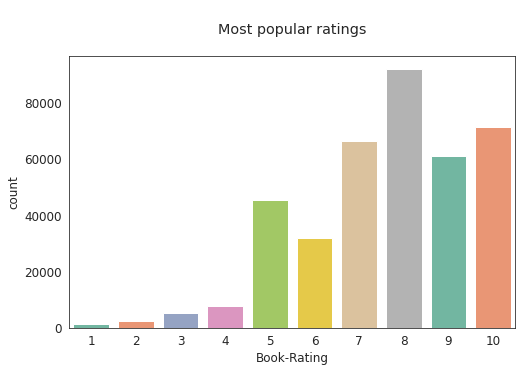

In [ ]:
# most popular rating
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=df, x='Book-Rating',palette='Set2')

* Most of users have given above 4 ratings to books 
* 8 is the most common rating given by users


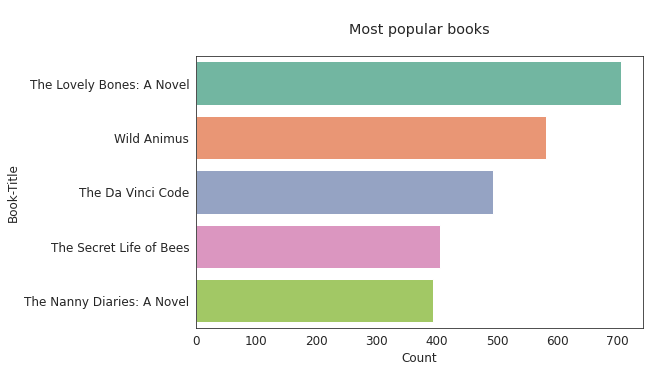

In [ ]:
# top 5 most popular books

popular = df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:5]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')

* The book which has been rated by most number of users is  'The Lovely Bones'

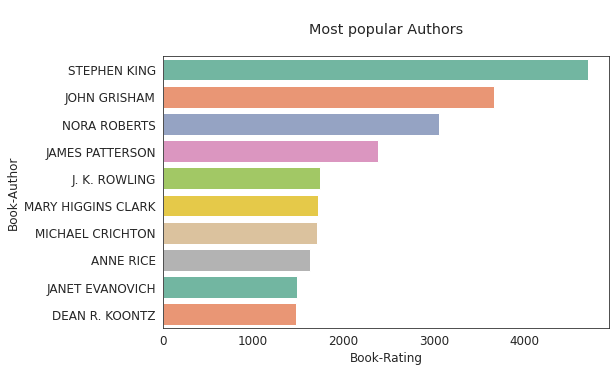

In [ ]:
# most popular book authors
author = df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

* Top book author with respect to the number of ratings is Stephen King 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


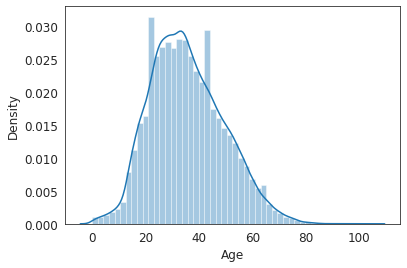

In [ ]:
#Age distribution of users
age_df=users_df[users_df['User-ID'].isin(list(df['User-ID'].unique()))]
sns.distplot(age_df.Age)

* The majority of readers are between the ages of 25 and 40.
* Readers who are 80 to 100 years old make up a tiny minority.

Text(0.5, 0, 'No of users')

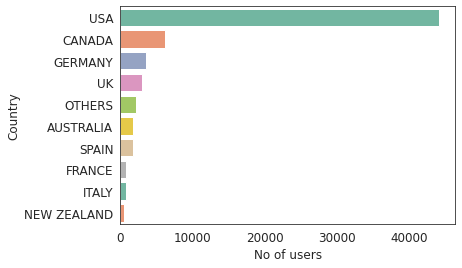

In [ ]:
# countries with most readers
countries = df.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')
plt.xlabel('No of users')

* Most of the readers  are from the United States

In [ ]:
#How many users have rated atleast 1 book?
df['User-ID'].value_counts()

11676     6940
98391     5692
189835    1899
153662    1846
23902     1180
          ... 
37259        1
53095        1
51124        1
235548       1
259679       1
Name: User-ID, Length: 68080, dtype: int64

There are 68080 users who have rated atleast one book

In [ ]:
df.groupby('User-ID')['Book-Rating'].count().describe()

count    68080.000000
mean         5.635914
std         41.736965
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6940.000000
Name: Book-Rating, dtype: float64

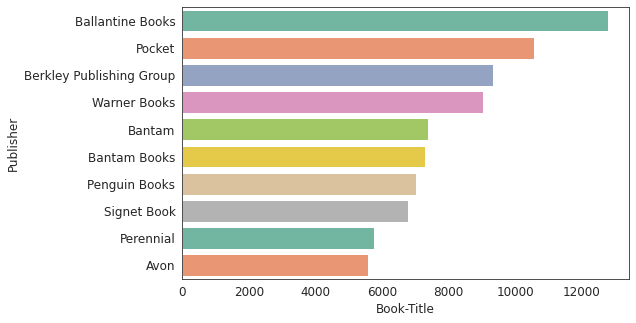

In [ ]:
# Publisher with most books

publishers = df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')

*  Ballantine Books is most popular publisher based on the number of users who have rated their books

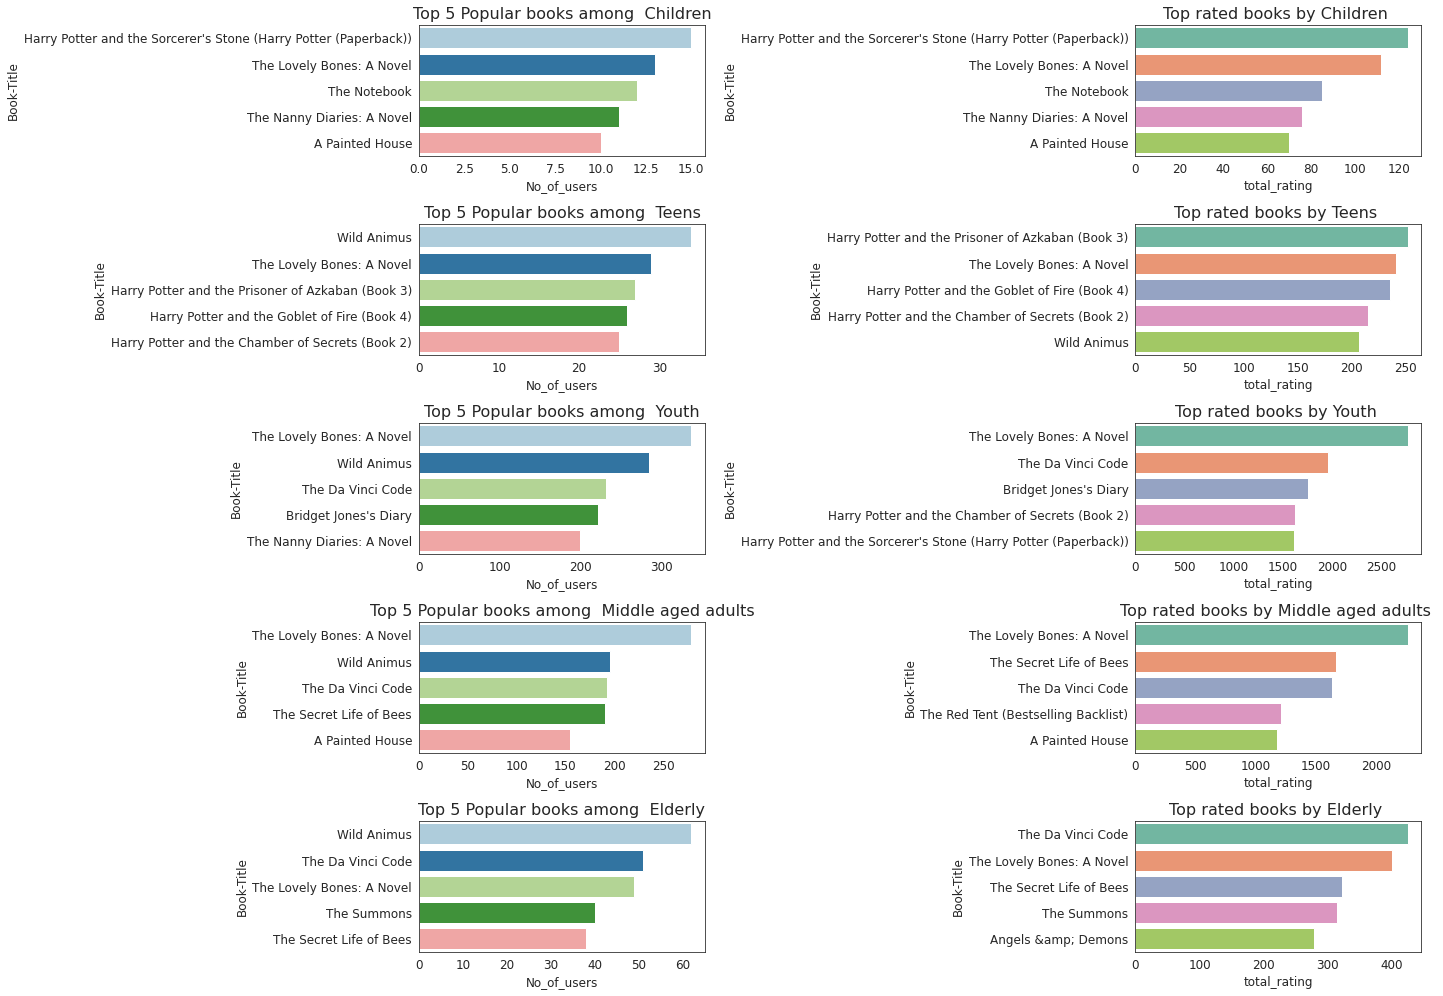

In [ ]:
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age_df=df.loc[df['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

In [ ]:
df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,8,5,12.0,Children,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.0,Scribner,8,5,12.0,Children,CANADA




---


**EDA CONCLUSIONS**
* The Lovely Bones: A Novel and Wild Animus are the two most read books.
* Most popular book author based on the number of ratings is Stephan King .
* Ballantine Books and Pocket are the top publishers based on the number of ratings that their books have received.
* The majority of readers are between the ages of 20 and 40.
* The majority of readers who have given the books ratings are from the United States and Canada.
* Regardless of the age group, The Lovely Bones and Wild animus appear on lists of the top-rated books.


# **Popularity Based Recommendation System**

## It is a type of recommendation system that bases choices on factors like popularity and/or current trends. 

## **Simple Popularity based recommendation system**

In [ ]:
# function for getting most popular recommendations

def most_popular(df, n):
  if n >= 1 and n <= len(df):
    popular = df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False).head(n)
    return pd.merge(popular, books_df, on='ISBN')
  return 'Please enter a valid value of n!'

In [ ]:
most_popular(df, 3)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
1,0971880107,581,Wild Animus,RICH SHAPERO,2004.0,Too Far
2,0385504209,487,The Da Vinci Code,DAN BROWN,2003.0,Doubleday


## **Country-based book recommendation**

In [ ]:
# function for getting most popular recommendations country wise

def country_popular(df, country):
  if country in list(df.Country.unique()):
    return most_popular(df[df['Country'] == country], 5) # calling most_popular function to get popular recommendations
  return 'This country is not present in the dataset. Please enter some other country.'

In [ ]:
country_popular(df, 'INDIA')

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0971880107,3,Wild Animus,RICH SHAPERO,2004.0,Too Far
1,0671047612,2,Skin And Bones,FRANKLIN W. DIXON,2000.0,Aladdin
2,0486284735,2,Pride and Prejudice (Dover Thrift Editions),JANE AUSTEN,1995.0,Dover Publications
3,8171670407,2,Inscrutable Americans,MATHUR ANURAG,1996.0,South Asia Books
4,0006944035,1,Secret Island / Secret Mountain (Two-in-ones),ENID BLYTON,1994.0,HarperCollins Publishers


## **Weighted average rating method**

Using Weighted average for each Book’s Average Rating

**W = (Rv + Cm)/(v + m)**

where

W= Weighted Rating

R = Average of the Books rating 

v = No of people who have rated the books(number of votes)

m = minimum no of votes to be listed

C = the mean rating across all the books

In [ ]:
#finding the average rating and number of votes received by books
df_relevant_data = df.groupby(['Book-Title','Book-Author'],as_index=False).agg(avg_rating=('Book-Rating','mean'),ratings_count=('Book-Rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}  ')

The average rating of all the books is 7.5215700757025665 and the minimum number of votes required by the books to be listed is 4  


In [ ]:
#Calculating weighted average rating of the books
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [ ]:
df_relevant_data.sort_values(by='weighted_average',ascending=False).head(10)

,Book-Title,Book-Author,avg_rating,ratings_count,weighted_average
46516,Harry Potter and the Chamber of Secrets Postcard Book,J. K. ROWLING,9.869565,23,9.52
122145,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. TOLKIEN,9.653846,52,9.50
30142,Dilbert: A Book of Postcards,SCOTT ADAMS,9.923077,13,9.36
81784,Postmarked Yesteryear: 30 Rare Holiday Postcards,PAMELA E. APKARIAN-RUSSELL,10.000000,11,9.34
118127,"The Return of the King (The Lord of the Rings, Part 3)",J.R.R. TOLKIEN,9.397436,78,9.31
17713,Calvin and Hobbes,BILL WATTERSON,9.583333,24,9.29
100902,The Authoritative Calvin and Hobbes (Calvin and Hobbes),BILL WATTERSON,9.600000,20,9.25
72637,"My Sister's Keeper : A Novel (Picoult, Jodi)",JODI PICOULT,9.545455,22,9.23
118123,"The Return of the King (The Lord of The Rings, Part 3)",J. R. R. TOLKIEN,9.625000,16,9.20
120090,The Sneetches and Other Stories,DR. SEUSS,10.000000,8,9.17


This is the list of most favored books based on the weighted rating scores. The book 'Harry Potter and the Chamber of Secrets Postcard Book' seems to have top this chart.

## **Author based recommender system**

In [ ]:
def author_based(book_title,number,df_relevant_data=df_relevant_data):
  '''
  To recommend books from the same author as the book entered by the user
  '''
  author=df_relevant_data.loc[df_relevant_data['Book-Title']==book_title]['Book-Author'].unique()[0]
  author_df=df_relevant_data.loc[(df_relevant_data['Book-Author']==author)].sort_values(by='weighted_average',ascending=False)
  print(f'The author of the book {book_title} is {author}\n')
  print(f'Here are the top {number} books from the same author\n')
  top_rec=author_df.loc[(author_df['Book-Title']!=book_title),['Book-Title','weighted_average']].head(number)
  return(top_rec)


In [ ]:
#get book name and number of books to recommend
book_title = 'Harry Potter and the Chamber of Secrets (Book 2)'
number =5
author_based(book_title,number)
# top_recommendations from the same author

The author of the book Harry Potter and the Chamber of Secrets (Book 2) is J. K. ROWLING

Here are the top 5 books from the same author



,Book-Title,weighted_average
46516,Harry Potter and the Chamber of Secrets Postcard Book,9.52
46520,Harry Potter and the Goblet of Fire (Book 4),9.10
46532,Harry Potter and the Prisoner of Azkaban (Book 3),9.02
46539,Harry Potter and the Sorcerer's Stone (Book 1),9.02
46524,Harry Potter and the Order of the Phoenix (Book 5),9.01


---
# **Collaborative filtering**





### Collaborative filtering techniques create a model based on past user activity (items previously purchased, movies viewed and rated, etc.) as well as usage choices made by both current and past users. Then, this model is used to predict the ratings for items or items themselves that the user might be interested in.
---

## **Memory Based Approach**

### **KNN Based Algorithm**

In [ ]:
# we kept running into memory issues, so decided to reduce some data by filtering things out
# focussing on users with more than 3 ratings and top 10% most frequently rated books
required_ratings = 3

user = df['User-ID'].value_counts()
user_list = user[user >required_ratings].index.to_list()
filter_df = df[df['User-ID'].isin(user_list)]

print('Number of users with ratings more than 3 are: {}'.format(filter_df.shape[0]))

Number of users with ratings more than 3 are: 313417


In [ ]:
# top 10% most frequently rated books
required = len(filter_df.ISBN.unique()) * 0.1

user_list = filter_df['Book-Title'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['Book-Title'].isin(user_list)]

print('Number of top 10% users are: {}'.format(filter_df.shape[0]))

Number of top 10% users are: 167394


In [ ]:
# shape of final dataset
filter_df.shape

(167394, 10)

In [ ]:
# creating a pivot table
table = filter_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Yo!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
".Hack: //Legend of the Twilight, Vol. 1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
one hundred years of solitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# filling null values
table.fillna(0, inplace=True)
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Yo!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
".Hack: //Legend of the Twilight, Vol. 1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one hundred years of solitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# converting to sparse matrix
from scipy.sparse import csr_matrix

sparse = csr_matrix(table)
sparse

<13403x14947 sparse matrix of type '<class 'numpy.float64'>'
	with 166539 stored elements in Compressed Sparse Row format>

In [ ]:
#Creating an instance of KNN
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
# function to get recommendations

def get_recommendations(name, n):

  # getting book id
  book_id= np.where(table.index==name)[0][0]

  # distances and suggestions based on similarity
  distances, suggestions = model.kneighbors(table.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  suggestions = suggestions.flatten().tolist()

  for i in range(len(suggestions)):
    # if book is same as input
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[suggestions[i]])
  return

In [ ]:
get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation
Lover Beware
J. K. Rowling: The Wizard Behind Harry Potter
A Dash of Death
So Much to Tell You
Dragonquest Achille Cover


### **KNN with cosine metric**

In [ ]:
#Creating an instance of KNN with cosine metric

model_cosine = NearestNeighbors(metric='cosine', algorithm='brute')
model_cosine.fit(sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# function to get recommendations

def get_cosine_recommendations(name, n):

  print('Cosine Similarity based recommendations.\n')

  # distances and indices based on similarity
  distances, indices = model_cosine.kneighbors(table.loc[name].values.reshape(1, -1), n_neighbors = n+1)

  for i in range(len(distances.flatten())):
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[indices.flatten()[i]])
  return

In [ ]:
get_cosine_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

Cosine Similarity based recommendations.

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Hobbit: or There and Back Again
The Two Towers (The Lord of the Rings, Part 2)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation


## **KNN-Location based**

Using KNN algorithm, clusters of similar users based on common book ratings can be found and predictions can be made using the average rating of the top-k nearest neighbors.

In [ ]:
book_rating = df[['User-ID','ISBN','Book-Rating','Book-Title']]
print(book_rating.info())
print(book_rating.shape)
print(book_rating.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383693 entries, 0 to 383692
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      383693 non-null  int64 
 1   ISBN         383693 non-null  object
 2   Book-Rating  383693 non-null  int64 
 3   Book-Title   383693 non-null  object
dtypes: int64(2), object(2)
memory usage: 22.7+ MB
None
(383693, 4)
   User-ID        ISBN  Book-Rating  \
0        8  0002005018            5   
1        8  074322678X            5   
2        8  0887841740            5   
3        8  1552041778            5   
4        8  1567407781            6   

                                     Book-Title  
0                                  Clara Callan  
1       Where You'll Find Me: And Other Stories  
2                            The Middle Stories  
3                                      Jane Doe  
4  The Witchfinder (Amos Walker Mystery Series)  


In [ ]:
book_rating = book_rating.dropna(axis=0, subset= ['Book-Title'])
book_ratingCount = (book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating' : 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])
book_ratingCount.head()

,Book-Title,totalRatingCount
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
2,Dark Justice,1
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),2


In [ ]:
rating_with_totalRatingCount = book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how ='left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,8,0002005018,5,Clara Callan,9
1,8,074322678X,5,Where You'll Find Me: And Other Stories,1
2,8,0887841740,5,The Middle Stories,1
3,8,1552041778,5,Jane Doe,2
4,8,1567407781,6,The Witchfinder (Amos Walker Mystery Series),1


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   135510.000
mean         2.831
std          9.134
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        707.000
Name: totalRatingCount, dtype: float64


In [ ]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    5.000
0.920    5.000
0.930    6.000
0.940    7.000
0.950    8.000
0.960   10.000
0.970   13.000
0.980   17.000
0.990   29.000
Name: totalRatingCount, dtype: float64


In [ ]:
popularity_threshold = 100
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
8,11676,0399135782,9,The Kitchen God's Wife,115
10,11676,0440234743,9,The Testament,261
14,11676,0971880107,6,Wild Animus,581
15,11676,0345417623,10,Timeline,263
17,11676,0449005615,10,Seabiscuit: An American Legend,133


### Filtering to users in top 2 countries - US & Canada

In [ ]:
combined = rating_popular_book.merge(users_df, left_on ='User-ID', right_on= 'User-ID', how='left')

us_canada_user_rating = combined[combined['Country'].str.contains("USA|CANADA")]
us_canada_user_rating = us_canada_user_rating.drop('Age', axis = 1)

us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Age_group,Country
225,67544,0316569321,7,White Oleander : A Novel,177,Youth,CANADA
226,67544,0316601950,8,The Pilot's Wife : A Novel,272,Youth,CANADA
229,210926,0440212561,10,Outlander,139,Middle aged adults,CANADA
230,263325,0446310786,10,To Kill a Mockingbird,267,Youth,CANADA
231,263325,0786868716,8,The Five People You Meet in Heaven,244,Youth,CANADA


### **Implementing KNN**

In [ ]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot_table(index = 'Book-Title', columns= 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i==0:
        print('Recommendations for', format(us_canada_user_rating_pivot.index[query_index]), ':')
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Brave New World :
1: 1984, with distance of 0.8646034758497547:
2: Fahrenheit 451, with distance of 0.8992660359241804:
3: To Kill a Mockingbird, with distance of 0.9264606836041259:
4: The Catcher in the Rye, with distance of 0.9266570602901562:
5: Lord of the Flies, with distance of 0.9351021225794522:


## **Model Based Approach**


---


##  **Singular Value Decomposition**

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import random
import math

###**Filtering the number of books and users**

In [ ]:
#Filtering books with more than 5 reviews

print('The number of books that are explicitely rated are',explicit_rating['ISBN'].nunique())
ratings_count_df=explicit_rating.groupby("ISBN")['User-ID'].count().to_frame('No-of-rated-users').reset_index()
selected_books =list(ratings_count_df.loc[ratings_count_df['No-of-rated-users']>5,'ISBN'].unique())
print('Number of  books rated by atleast 5 users:',len(selected_books))
filter_df=explicit_rating.loc[explicit_rating['ISBN'].isin(selected_books)]

The number of books that are explicitely rated are 149655
Number of  books rated by atleast 5 users: 10731


In [ ]:
#keeping books with selected users
print('The number of users who have explicitely rated books are',explicit_rating['User-ID'].nunique())

#keeps Users who have rated more than five books
books_count_df=filter_df.groupby("User-ID")['ISBN'].count().to_frame('No-of-books-rated').reset_index()
selected_users = list(books_count_df.loc[books_count_df['No-of-books-rated']>5,'User-ID'].unique())
print('Number of  users who have rated atleast 5 books are :',len(selected_users))

#dataframe with filtered number of interactions
filter_df=filter_df.loc[filter_df['User-ID'].isin(selected_users)]
print('The shape of data fame with filtered number of interactions : ',filter_df.shape)

The number of users who have explicitely rated books are 68080
Number of  users who have rated atleast 5 books are : 5911
The shape of data fame with filtered number of interactions :  (114147, 3)


In [ ]:
complete_df = filter_df.copy()

In [ ]:
complete_df['Book-Rating'].describe()

count   114147.000
mean         7.817
std          1.774
min          1.000
25%          7.000
50%          8.000
75%          9.000
max         10.000
Name: Book-Rating, dtype: float64

In [ ]:
def smooth_user_preference(x):
    '''Function to smooth column'''
    return math.log(1+x, 2)
#applying function
complete_df['Book-Rating']= complete_df['Book-Rating'].apply(smooth_user_preference)
complete_df.head()

,User-ID,ISBN,Book-Rating
177,276847,3404148576,3.170
179,276847,3423071516,3.459
186,276847,3442413508,3.459
189,276847,3442437717,3.000
190,276847,3442441080,3.459


In [ ]:
train_df, test_df = train_test_split(complete_df,
                                   stratify=complete_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=0)

print('# interactions on Train set: %d' % len(train_df))
print('# interactions on Test set: %d' % len(test_df))

# interactions on Train set: 91317
# interactions on Test set: 22830


In [ ]:
#displaying the first 5 rows of test set
test_df.head()

,User-ID,ISBN,Book-Rating
595435,143415,0804117683,2.585
1129708,271195,0061091502,3.170
921324,224430,0446675059,3.322
963425,232492,0553580191,3.459
415865,98783,0553290797,3.170


In [ ]:
#Creating a sparse pivot table with users in rows and ISBN number of books in columns
users_books_pivot_matrix_df = train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_books_pivot_matrix_df.head()

ISBN,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,000649840X,0006546684,0006547834,0006550576,...,881787017X,8838910170,8845205118,8845247414,8845915611,9074336329,950491036X,9681500555,968150108X,9726101794
User-ID,,,,,,,,,,,,,,,,,,,,,
114,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
243,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
244,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
254,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
388,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
#Creating a matrix with the values of users_books_pivot_matrix_df
original_ratings_matrix = users_books_pivot_matrix_df.values
original_ratings_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Storing the User-IDs in a list
user_ids = list(users_books_pivot_matrix_df.index)
user_ids[:10]

[114, 243, 244, 254, 388, 446, 503, 505, 507, 638]

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(original_ratings_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
#converting sigma to a diagonal matrix
sigma = np.diag(sigma)

 After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It has generated rating predictions for books with which users have not yet interacted (and therefore not rated), which we will use to recommend relevant books to the user.

In [ ]:
#Rating matric reconstructed using the matrices obtained after factorizing
predicted_ratings_matrix = np.dot(np.dot(U, sigma), Vt) 
predicted_ratings_matrix 

array([[-4.04258460e-03,  5.55244996e-03,  3.55055121e-04, ...,
         1.50895745e-03,  2.40835026e-03, -4.47942990e-04],
       [ 2.39738748e-03,  7.31390062e-03,  1.06721793e-03, ...,
         2.41422467e-03, -2.50155111e-03,  7.07560167e-04],
       [ 2.76172022e-03,  2.46976045e-03,  3.93502515e-04, ...,
         7.51697062e-05, -3.15196343e-04,  4.15219598e-04],
       ...,
       [-3.77213135e-03,  4.35044249e-03,  7.91362149e-04, ...,
        -1.50838380e-03,  3.13716934e-04,  7.99373179e-05],
       [-9.99820694e-04, -5.55826794e-03, -1.68973261e-04, ...,
        -2.70869693e-04, -2.11730260e-03,  7.02884677e-03],
       [ 3.24745355e-03,  2.10480356e-03, -1.81779252e-04, ...,
        -3.05056878e-03, -1.71475791e-04,  2.70358799e-04]])

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix , columns = users_books_pivot_matrix_df.columns, index=user_ids).transpose()
predicted_ratings_df.head()

,114,243,244,254,388,446,503,505,507,638,...,278221,278314,278356,278390,278418,278535,278554,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,-0.004,0.002,0.003,-0.004,-0.000,-0.000,0.002,-0.001,0.005,0.014,...,0.001,0.001,-0.001,0.002,0.002,0.002,0.000,-0.004,-0.001,0.003
0002251760,0.006,0.007,0.002,0.021,0.001,0.001,0.002,0.004,0.004,0.015,...,-0.000,0.001,-0.001,0.005,-0.005,-0.000,0.001,0.004,-0.006,0.002
0002259834,0.000,0.001,0.000,0.002,0.000,0.000,0.000,-0.000,0.000,0.000,...,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.001,-0.000,-0.000
0002558122,-0.004,-0.003,0.002,-0.005,-0.000,-0.001,0.001,-0.000,0.002,0.014,...,-0.000,0.001,0.002,0.002,0.002,0.004,0.000,-0.005,-0.002,0.003
0006480764,-0.000,0.003,0.001,0.001,-0.000,0.000,0.001,-0.000,0.001,0.009,...,0.000,0.000,-0.002,-0.000,0.000,-0.000,0.000,0.000,0.009,-0.001


### **Building the Recommender model**

In [ ]:
class CFRecommender:
    #Storing model name
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        #Creating attributes
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        '''This will return model name'''
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            #runs only if verbose=True
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
            #Merging 
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[["ISBN",'Book-Title',	'Book-Author','Publisher']]

        return recommendations_df

#Creating object of the class   
cf_recommender_model = CFRecommender(predicted_ratings_df, books_df)

In [ ]:
def get_items_interacted(person_id, interactions_df):
    '''
    This function will take user id as input and return interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['ISBN']
    #Repetation is avoided by taking set
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
#Indexing by personId to speed up the searches during evaluation
full_indexed_df =complete_df.set_index('User-ID')
train_indexed_df = train_df.set_index('User-ID')
test_indexed_df = test_df.set_index('User-ID')

Let's predict the relevant books for User ID 254.Before that,let's see the list of books that were already rated/purchased by this user.

In [ ]:
#The books that were already rated by this user
print(f'These are  books that the user ID {user_ids[3]} has already rated \n')
books_df.loc[books_df['ISBN'].isin(list(get_items_interacted(user_ids[3],train_indexed_df)))]['Book-Title']

These are  books that the user ID 254 has already rated 



274                            The Golden Compass (His Dark Materials, Book 1)
282                                                        Making Minty Malone
285                                                                Animal Farm
356                                                    The Secret Life of Bees
485                                      She's Come Undone (Oprah's Book Club)
1175                                                             American Gods
2785                                       The Hobbit: or There and Back Again
2809                            Harry Potter and the Sorcerer's Stone (Book 1)
2969                                                 The Bonesetter's Daughter
3459                          Harry Potter and the Chamber of Secrets (Book 2)
3839                         Harry Potter and the Prisoner of Azkaban (Book 3)
4241                                                    American Gods: A Novel
5431                              Harry Potter and t

In [ ]:
#Recommendation for a single user
print(f'Recommending books for User ID: {user_ids[3]} ')
cf_recommender_model.recommend_items(user_ids[3],items_to_ignore= get_items_interacted(user_ids[3],train_indexed_df),verbose=True)

Recommending books for User ID: 254 


,ISBN,Book-Title,Book-Author,Publisher
0,043935806X,Harry Potter and the Order of the Phoenix (Book 5),J. K. ROWLING,Scholastic
1,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. ROWLING,Arthur A. Levine Books
2,0439139600,Harry Potter and the Goblet of Fire (Book 4),J. K. ROWLING,Scholastic Paperbacks
3,0446310786,To Kill a Mockingbird,HARPER LEE,Little Brown &amp; Company
4,0385504209,The Da Vinci Code,DAN BROWN,Doubleday
5,0345339681,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,Del Rey
6,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",MITCH ALBOM,Doubleday
7,0316769487,The Catcher in the Rye,J.D. SALINGER,"Little, Brown"
8,0345339703,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,Del Rey
9,0345339711,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,Del Rey


###**Model Evaluation**

In [ ]:
# Function for getting the set of books which a user has not interacted with
def get_not_interacted_items_sample(person_id, sample_size, seed=42):
    #Storing interacted items
    interacted_items = get_items_interacted(person_id, full_indexed_df)
    #Getting set of all items
    all_items=set(full_indexed_df["ISBN"])
    #Obtaining non interacted items
    non_interacted_items = all_items - interacted_items

    random.seed(seed)
    #Selecting random sample of given sample_size
    non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
    return set(non_interacted_items_sample)

In [ ]:
#Top-N accuracy metrics
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                #Stores index of item id if it is present in the recommended_items
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                #If item id is not found in the recommended list
                index = -1
            #checking whether index is present in the topN items or not
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = test_indexed_df.loc[person_id]
        
        #Obtaining unique interacted items by the user
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=42)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            #Counting hit at 5
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            #Counting hit at 10
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        
        #Creating a dictionary
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        #Calculating metrics for all users in the test set
        for idx, person_id in enumerate(list(test_indexed_df.index.unique().values)):    
            #Returns dictionary containing person_metrics for each user
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            #Adds user_id to the dictionary
            person_metrics['_person_id'] = person_id
            #Appends each dictionary to the list
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)
        #Creates dataframe containing value of metrics for all the users using the list of dictionaries
        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        #Calculating global recall@5 and global recall@10
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        #Creates dictionary containing global metrics
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
5910 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.3102058694699956, 'recall@10': 0.42216381953569865}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
36,55,100,545,0.101,0.183,11676
202,44,73,139,0.317,0.525,98391
271,27,35,93,0.290,0.376,153662
60,27,32,88,0.307,0.364,16795
474,16,26,73,0.219,0.356,95359
485,42,54,72,0.583,0.750,114368
390,32,32,61,0.525,0.525,104636
456,15,22,54,0.278,0.407,158295
660,32,40,54,0.593,0.741,123883
659,7,13,53,0.132,0.245,35859


# **Conclusion**

* The initial step,of our project was Data preprocessing of the three datasets-books_df,users_df and ratings_df,wherein we removed  duplicates and imputed the missing values & invalid entries with appropriate values,corrected spellings. 
* Then,we performed Exploratory Data Analysis to find out the countries with maximum users,popular books,popular authors and popular publishing companies.We also analysed the rating distribution,age distribution of users and the popular books amongst various age groups .
* Then,we used  Popularity-based approach,Collaborative filtering approach to built different types of recommendation models.
*We evaluated the performance of Singular Value Decomposition based recommender and obtained a  Global Recall@5 of 30 %  and Recall@10 of 41%

